In [108]:
import numpy as np
from scipy.linalg import svd
import matplotlib.pyplot as plt

## Generate bivariate data with a few Gaussians of Different Means and Covariance

/Users/brianxia/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: covariance is not positive-semidefinite.
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/brianxia/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:9: RuntimeWarning: covariance is not positive-semidefinite.
  if __name__ == '__main__':
/Users/brianxia/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:12: RuntimeWarning: covariance is not positive-semidefinite.
  if sys.path[0] == '':


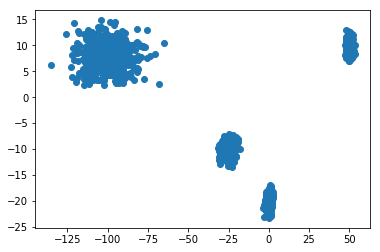

In [252]:
mean1 = [0, -20]
cov1 = [[1,0.5], [0,1]]
g1 = np.random.multivariate_normal(mean1, cov1, 500)
mean2 = [50, 10]
cov2 = [[1,0],[0,1]]
g2 = np.random.multivariate_normal(mean2, cov2, 500)
mean3 = [-100, 8]
cov3 = [[100,1.5],[1,6]]
g3 = np.random.multivariate_normal(mean3, cov3, 500)
mean4 = [-25, -10]
cov4 = [[5,0.5], [0,1]]
g4 = np.random.multivariate_normal(mean4, cov4, 500)
data = np.vstack((np.vstack((np.vstack((g1, g2)), g3)), g4))
plt.scatter(data[:,0], data[:,1])

## A Fully Vectorized Vanilla Kmean for Bivariate Data
#### Implemented as a baseline to compare with the tensor method

[[-0.49248299  0.21325321]
 [-0.21247356 -0.20381263]
 [-0.07060187  0.09936494]
 [-0.27761139  0.20437232]]
('...', 0, '...', 82.87116970398502)
('...', 1, '...', 47.519718129807565)
('...', 2, '...', 8.786370719987364)
('...', 3, '...', 0.0)
('...', 4, '...', 0.0)


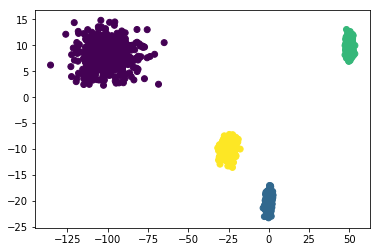

In [256]:
def bivariate_kmean(k, data, tolerance, iteration):
    means = (np.random.rand(k, 2) - 0.5)
    print means
    tol = float('inf')
    count = 0
    while (tol > tolerance and count < iteration) or count < 5:
        assignments = np.power(np.power(data - means[:,None], 2).sum(axis=2), 0.5).argmin(axis=0)
        mask = assignments == np.linspace(0,k-1,k)[:,None]
        new_means = (data * mask[...,None]).sum(axis=1) / (mask.sum(axis=1)[...,None] + 0.0001)
        tol = (((means - new_means)**2).sum())**.5
        means = new_means
        print ("...", count, "...", tol)
        count += 1
    return means, assignments

k = 4
means, assigments = bivariate_kmean(k, data, 0.000001, 100)
plt.scatter(data[:,0], data[:,1], c=assigments)

## Applying PCA to Data
#### Reduce data to one dimension and plot to visualize data projections

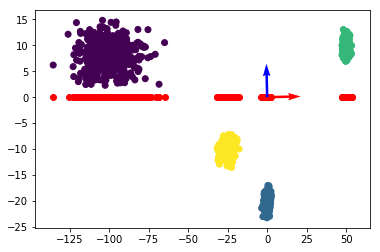

In [258]:
cov = np.cov(data.T)
w, v = np.linalg.eig(cov)
transformed_data = np.dot(data, v[0])

plt.scatter(data[:,0], data[:,1], c=assigments)
plt.scatter(transformed_data, [0]*data.shape[0], color='r')
plt.quiver([0,0], [0,0], v[:,0], v[:,1], color=['red','blue'], scale=10)

## Applying SVD to Data Cluster

In [131]:
# define a matrix
# A = np.array([
# 	[1,2,3,4,5,6,7,8,9,10],
# 	[11,12,13,14,15,16,17,18,19,20],
# 	[21,22,23,24,25,26,27,28,29,30]])
A = data
print(A)
# Singular-value decomposition
U, s, VT = svd(A)
# create m x n Sigma matrix
Sigma = np.zeros((A.shape[0], A.shape[1]))
# populate Sigma with n x n diagonal matrix
Sigma[:A.shape[1], :A.shape[1]] = np.diag(s)
# select
n_elements = 2
Sigma = Sigma[:, :n_elements]
VT = VT[:n_elements, :]
# reconstruct
B = U.dot(Sigma.dot(VT))
print(B)
# transform
T = U.dot(Sigma)
print(T)
T = A.dot(VT.T)
print(T)

[[   2.81003052  -19.10144202]
 [   0.89430518  -19.09159932]
 [   0.64541306  -19.84093205]
 ...
 [-104.91710498    6.44474385]
 [ -95.5263558     6.8042041 ]
 [ -92.78622286    7.47153914]]
[[   2.81003052  -19.10144202]
 [   0.89430518  -19.09159932]
 [   0.64541306  -19.84093205]
 ...
 [-104.91710498    6.44474385]
 [ -95.5263558     6.8042041 ]
 [ -92.78622286    7.47153914]]
[[ -3.2840683  -19.02567355]
 [ -1.36869043 -19.0634633 ]
 [ -1.1385054  -19.81875244]
 ...
 [105.04490483   3.83426775]
 [ 95.6659955    4.42709281]
 [ 92.94330109   5.16234766]]
[[ -3.2840683  -19.02567355]
 [ -1.36869043 -19.0634633 ]
 [ -1.1385054  -19.81875244]
 ...
 [105.04490483   3.83426775]
 [ 95.6659955    4.42709281]
 [ 92.94330109   5.16234766]]


In [170]:
U[2,:].std()

0.025813708257851148

(array([1.499e+03, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00]),
 array([-0.03880498,  0.06493019,  0.16866536,  0.27240053,  0.3761357 ,
         0.47987087,  0.58360604,  0.68734121,  0.79107638,  0.89481155,
         0.99854672]),
 <a list of 10 Patch objects>)

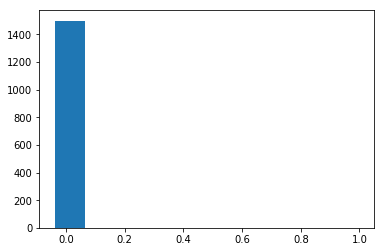

In [164]:
plt.hist(U[:,4])